<a href="https://colab.research.google.com/github/Abdulla-asim/DeepLearning/blob/main/Notebooks/01_PyTorch_Workflow_Fundamentals_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01_PyTorch_Workflow_Fundamentals_Exercise
### Create Data

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
# Create my own parameters
weight = 0.46
bias = 0.89

# Creating a range of data points
X = torch.randn(100).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[ 0.8271],
         [-0.8417],
         [ 0.7041],
         [-0.2040],
         [ 1.4320],
         [-0.5107],
         [ 1.5798],
         [-1.4727],
         [ 0.6767],
         [-0.4259]]),
 tensor([[1.2704],
         [0.5028],
         [1.2139],
         [0.7962],
         [1.5487],
         [0.6551],
         [1.6167],
         [0.2125],
         [1.2013],
         [0.6941]]))

### Split the Data

In [ ]:
# calculate 80% of the data
train_split = int(len(X) * 0.8) # <- 80% of the original data

# Splitting the data into test and train data
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

### Visualize


In [ ]:
def plot_data(train_data = X_train,
              train_labels = y_train,
              test_data = X_test,
              test_labels = y_test,
              predictions = None):

  plt.figure(figsize=(7,7))

  plt.scatter(train_data, train_labels, c='orange', s=4, label="Training Data")
  plt.scatter(test_data, test_labels, c='g', s=4, label="Test Data")

  # plot predictions if they are given as input
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  plt.legend()

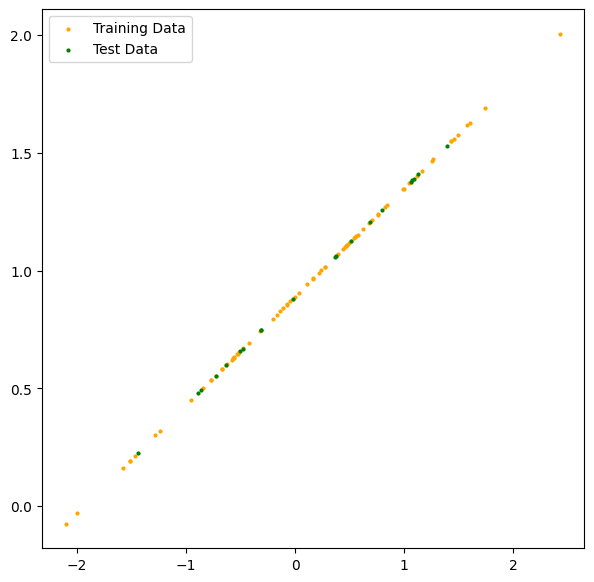

In [ ]:
plot_data()

### Build Model

In [ ]:
# Creating a class for linear regression model as a subclass of nn.Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [ ]:
torch.manual_seed(70)

# Creating an instance of the linear regression model
model_1 = LinearRegressionModel()

# Checking model's parameters
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.1300]])),
             ('linear_layer.bias', tensor([-0.2817]))])

In [ ]:
# Create the loss function
loss_fn = nn.L1Loss()

# Create the optimizer
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr = 0.01)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Change model's device
model_1.to(device)

# Change data to device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# Check model's device
next(model_1.parameters()).device

device(type='cuda', index=0)

### Train and Test Loop

In [ ]:
# setting a manual seed
torch.manual_seed(70)

# number of iterations
epochs = 300

# Store data for plotting
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  ### Training Model

  # set model to train mode
  model_1.train()

  # Forward Pass
  train_pred = model_1(X_train)

  # Calculate loss
  train_loss = loss_fn(train_pred, y_train)

  # zero grad
  optimizer.zero_grad()

  # backpropagation
  train_loss.backward()

  # Gradient Descent
  optimizer.step()

  ### Testing Loop

  # setting model to evaluation mode
  model_1.eval()

  # using the inference mode context manager
  with torch.inference_mode():
    # forward pass
    test_pred = model_1(X_test)

    # Calculate loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 20 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(train_loss.item())
    test_loss_values.append(test_loss.item())
    print(f"Epochs: {epoch:3} | MAE Training Loss: {train_loss:1.5f} | MAE Test Loss: {test_loss:1.5f}")

Epochs:   0 | MAE Training Loss: 1.24545 | MAE Test Loss: 1.22838
Epochs:  20 | MAE Training Loss: 1.02000 | MAE Test Loss: 1.00616
Epochs:  40 | MAE Training Loss: 0.79696 | MAE Test Loss: 0.78435
Epochs:  60 | MAE Training Loss: 0.57363 | MAE Test Loss: 0.56227
Epochs:  80 | MAE Training Loss: 0.35013 | MAE Test Loss: 0.34006
Epochs: 100 | MAE Training Loss: 0.17477 | MAE Test Loss: 0.15970
Epochs: 120 | MAE Training Loss: 0.00221 | MAE Test Loss: 0.00710
Epochs: 140 | MAE Training Loss: 0.01168 | MAE Test Loss: 0.01132
Epochs: 160 | MAE Training Loss: 0.00135 | MAE Test Loss: 0.00047
Epochs: 180 | MAE Training Loss: 0.00038 | MAE Test Loss: 0.00124
Epochs: 200 | MAE Training Loss: 0.00056 | MAE Test Loss: 0.00106
Epochs: 220 | MAE Training Loss: 0.00139 | MAE Test Loss: 0.00226
Epochs: 240 | MAE Training Loss: 0.00107 | MAE Test Loss: 0.00113
Epochs: 260 | MAE Training Loss: 0.00081 | MAE Test Loss: 0.00136
Epochs: 280 | MAE Training Loss: 0.00168 | MAE Test Loss: 0.00118


### Visualize the loss curve

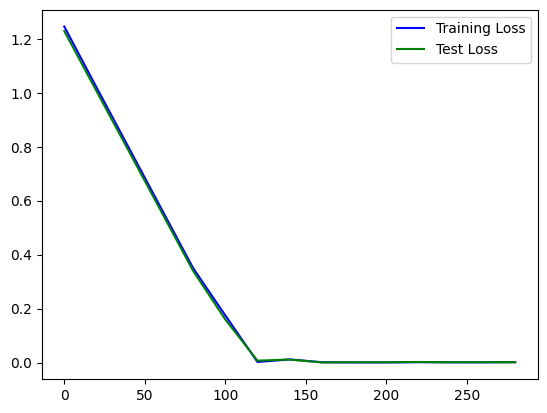

In [ ]:
plt.plot(epoch_count, train_loss_values, c="b", label="Training Loss")
plt.plot(epoch_count, test_loss_values, c='g', label="Test Loss")

plt.legend()

### Visualize the Predictions

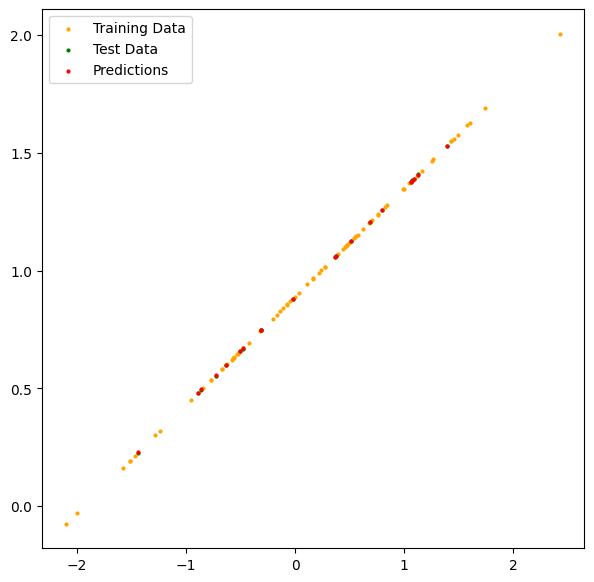

In [ ]:
plot_data(predictions=test_pred.cpu())

In [ ]:
print(f"Original weight and bias used:")
print(f"weight: {weight}, bias: {bias}\n")

print(f"Model's learned parameters:\n{model_1.state_dict()}")


Original weight and bias used:
weight: 0.46, bias: 0.89

Model's learned parameters:
OrderedDict([('linear_layer.weight', tensor([[0.4585]], device='cuda:0')), ('linear_layer.bias', tensor([0.8899], device='cuda:0'))])


### Save the Model


In [ ]:
from pathlib import Path

In [ ]:
# Create model path
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create Model Save Path
MODEL_NAME = "01_PyTorch_Project.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save model
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)
print(f"saving model: {MODEL_SAVE_PATH}")

saving model: Models/01_PyTorch_Project.pth


### Load saved model and perform predictions

In [ ]:
# creat a new instance of LinearRegressionModel
loaded_model = LinearRegressionModel()

# Load the state dict of saved model
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model.to(device)

loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4585]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8899], device='cuda:0'))])

In [ ]:
# Perfrom predictions
loaded_model.eval()

with torch.inference_mode():
  # forward pass
  new_pred = loaded_model(X_test)

  # loss calculation
  new_loss = loss_fn(new_pred, y_test)

new_pred == test_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')